In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

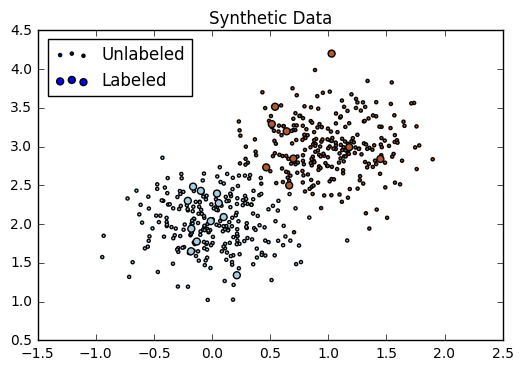

In [108]:
X, y = datasets.make_blobs(n_samples=1000, centers=[[0, 2], [1, 3]], 
                           cluster_std=[0.35, 0.35], random_state=1)
y[y == 0] = -1

n_label = 20
n_unlabel = 500

X_label = X[:n_label]
y_label = y[:n_label]

X_unlabel = X[n_label:n_label+n_unlabel]
y_unlabel = y[n_label:n_label+n_unlabel]

X_train = X[:n_label+n_unlabel]
y_train = y[:n_label+n_unlabel]

X_test = X[n_label+n_unlabel:]
y_test = y[n_label+n_unlabel:]

plt.scatter(X_unlabel[:,0], X_unlabel[:,1], c=y_unlabel, cmap=plt.cm.Paired, s=5)
plt.scatter(X_label[:,0], X_label[:,1], c=y_label, cmap=plt.cm.Paired, s=25)
plt.legend(['Unlabeled', 'Labeled'], bbox_to_anchor=(.35,1))
plt.title('Synthetic Data')
plt.show()

In [109]:
def plt_decision_boundry(model, X):
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    # Determine decision boundry
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    b_test = list(np.c_[XX.ravel(), YY.ravel()])
    Z = model.decision_function(b_test)

    # Put the result into a color plot
    Z = np.asarray(Z)
    Z = Z.reshape(XX.shape)
    #plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-1, 0, 1])

Score on labeled data in SGD: 0.520833333333


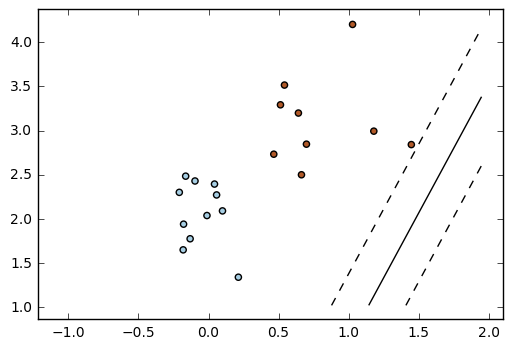

In [110]:
from svm_custom import SVM_SGD

mysgd = SVM_SGD(eta0=1, alpha=0.0001)
mysgd.fit(X_label, y_label)

print('Score on labeled data in SGD:', mysgd.score(X_test, y_test))

plt.scatter(X_label[:,0], X_label[:,1], c=y_label, cmap=plt.cm.Paired)
plt_decision_boundry(mysgd, X)
plt.show()

Score on all train data in SGD: 0.95625


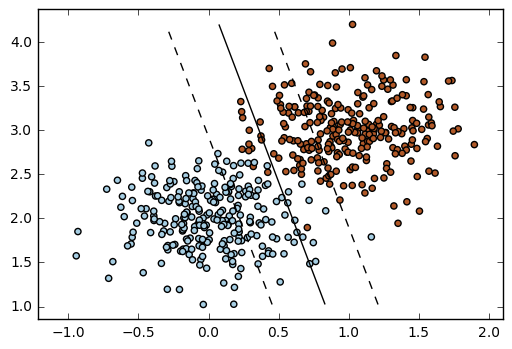

In [115]:
from svm_custom import SVM_SGD

mysgd = SVM_SGD(eta0=1, alpha=0.015)
mysgd.fit(X_train, y_train)

print('Score on all train data in SGD:', mysgd.score(X_test, y_test))

plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=plt.cm.Paired)
plt_decision_boundry(mysgd, X)
plt.show()

Score adding 500 unlabled samples: 0.960416666667


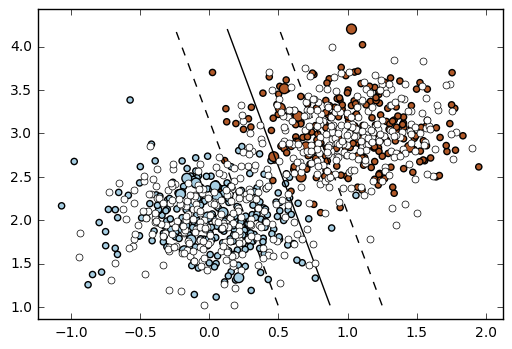

In [123]:
from ssl_svm import S3VM_SGD

s3vm = S3VM_SGD(knn=1, eta0=1, alpha=0.015)
num = 500
s3vm.fit(X_label, y_label, X_unlabel[:num])

print('Score adding', num, 'unlabled samples:', s3vm.score(X_test, y_test))

plt.plot(X_unlabel[:,0], X_unlabel[:,1], 'wo', markersize=5)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.Paired)
plt.scatter(X_label[:,0], X_label[:,1], c=y_label, cmap=plt.cm.Paired, s=50)
plt_decision_boundry(s3vm, X)
plt.show()

     pcost       dcost       gap    pres   dres
 0:  3.2698e+01 -1.1750e+03  3e+03  5e-01  1e-14
 1:  5.6417e+01 -2.0369e+02  3e+02  3e-15  2e-14
 2:  5.3231e+00 -2.6851e+01  3e+01  2e-15  8e-15
 3: -3.2458e+00 -7.6253e+00  4e+00  2e-16  6e-15
 4: -5.8324e+00 -8.2951e+00  2e+00  9e-16  7e-15
 5: -6.7755e+00 -6.8597e+00  8e-02  9e-16  6e-15
 6: -6.8164e+00 -6.8184e+00  2e-03  9e-16  7e-15
 7: -6.8177e+00 -6.8178e+00  3e-05  2e-15  5e-15
 8: -6.8178e+00 -6.8178e+00  3e-07  2e-16  1e-14
Optimal solution found.
Score using label and QP: 0.964583333333


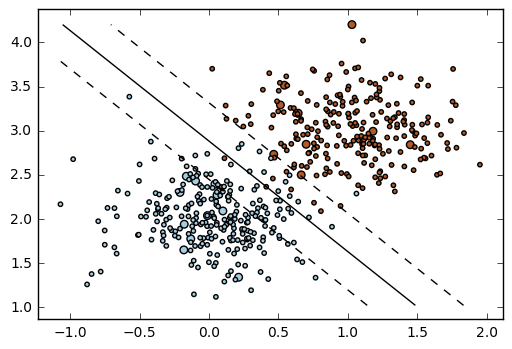

In [117]:
from svm_custom import SVM

mysvm = SVM(C=10)
mysvm.fit(X_label, y_label)

print('Score using label and QP:', mysvm.score(X_test, y_test))

#plt.plot(X_unlabel[:,0], X_unlabel[:,1], 'wo', markersize=5)
plt.scatter(X_label[:,0], X_label[:,1], c=y_label, cmap=plt.cm.Paired, s=30)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.Paired, s=10)
plt_decision_boundry(mysvm, X)
plt.show()

In [148]:
from collections import deque

x = [1, 2, 3, 4]
q = deque(x, maxlen=25)

deque([1, 2, 3, 4], maxlen=25)
